In [2]:
###Basic Getting started with pandas and numpy
###pandas for data cleaning and visualization
### Create a Series(Numpy arrays similar to python arrays)

import pandas as pd
import numpy as np

s  = pd.Series(np.random.randn(6),index = ['a','b','c','d','e','f'])
s1 = pd.Series([0,1,2,3,4,5] , index = ['a','b','c','d','e','f'])

print (s)
print ('\n')
print (s1)

a   -1.336787
b    0.146822
c    0.474252
d    0.468999
e   -1.159812
f    0.091031
dtype: float64


a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64


In [3]:
#create a DataFrame(Multiple SERIES in a table)

df = pd.DataFrame(s, columns = ["Column1"])
df

,Column1
a,-1.336787
b,0.146822
c,0.474252
d,0.468999
e,-1.159812
f,0.091031


In [4]:
df['Column1']
df["Column2"] = df["Column1"] * 4
df

,Column1,Column2
a,-1.336787,-5.347146
b,0.146822,0.587290
c,0.474252,1.897009
d,0.468999,1.875997
e,-1.159812,-4.639247
f,0.091031,0.364125


In [5]:
#mean = np.mean(x)
df.apply(lambda x :min(x)+ max(x))

Column1   -0.862534
Column2   -3.450137
dtype: float64

In [6]:
Mean = df.apply(lambda x :np.mean(x))
print(Mean)

##Describe 

#help(df.describe) 

Column1   -0.219249
Column2   -0.876995
dtype: float64


In [7]:
###Download data (from kaggle) in CSV format .Create a data frame

###data_frame is a one dimentional matrix

import matplotlib.pyplot as plt  #ec(%matplotlib inline)

DF= pd.read_csv("/home/user/Desktop/Python/data/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")


In [8]:
# Let's just consider the LandAverageTemperature
# "A primarily label-location based indexer

DF = DF.iloc[:,:2]
print (DF.head())
print (DF.tail())

           dt  LandAverageTemperature
0  1750-01-01                   3.034
1  1750-02-01                   3.083
2  1750-03-01                   5.626
3  1750-04-01                   8.490
4  1750-05-01                  11.573
              dt  LandAverageTemperature
3187  2015-08-01                  14.755
3188  2015-09-01                  12.999
3189  2015-10-01                  10.801
3190  2015-11-01                   7.433
3191  2015-12-01                   5.518


In [9]:
DF.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


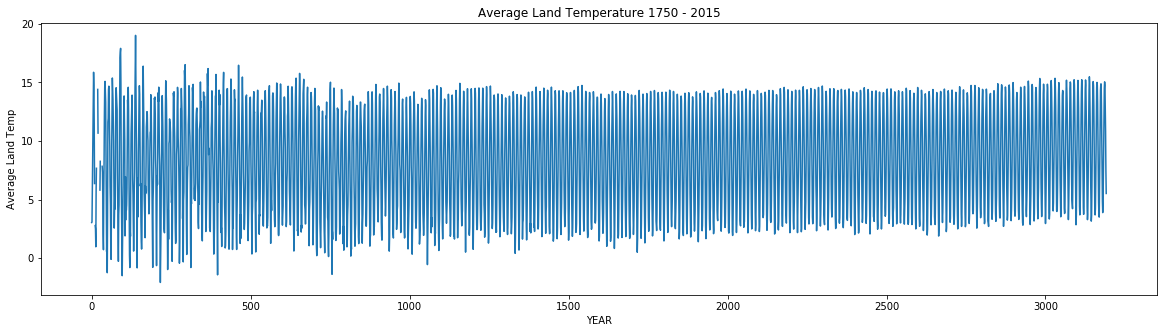

In [10]:
plt.figure(figsize=(20,5))
plt.plot(DF["LandAverageTemperature"])
plt.title("Average Land Temperature 1750 - 2015")
plt.xlabel("YEAR")
plt.ylabel("Average Land Temp")
plt.show()

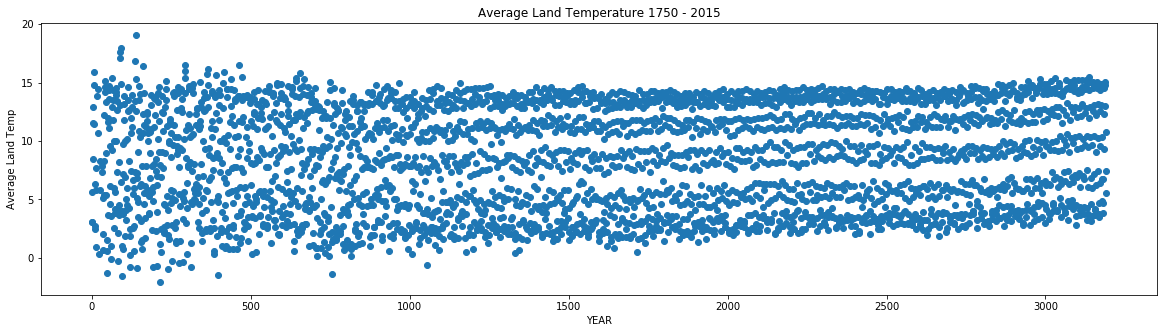

In [11]:
###Complex scatter plot by year


plt.figure(figsize=(20,5))
plt.scatter(x = DF["LandAverageTemperature"].index, y = DF["LandAverageTemperature"])
plt.title("Average Land Temperature 1750 - 2015")
plt.xlabel("YEAR")
plt.ylabel("Average Land Temp")
plt.show()

              dt  LandAverageTemperature
0     1750-01-01                   3.034
1     1750-02-01                   3.083
2     1750-03-01                   5.626
3     1750-04-01                   8.490
4     1750-05-01                  11.573
...          ...                     ...
3187  2015-08-01                  14.755
3188  2015-09-01                  12.999
3189  2015-10-01                  10.801
3190  2015-11-01                   7.433
3191  2015-12-01                   5.518

[3192 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


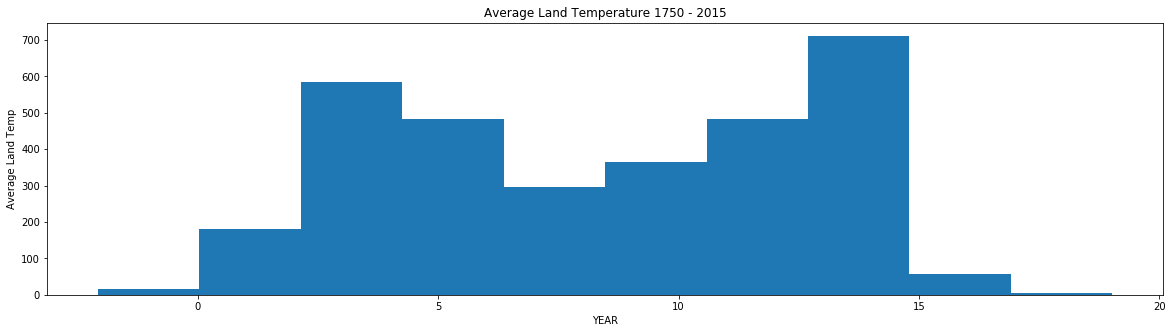

In [12]:
###Histogram plot by year This is wrong most likely
print (DF)

plt.figure(figsize=(20,5))
plt.hist(DF["LandAverageTemperature"])
plt.title("Average Land Temperature 1750 - 2015")
plt.xlabel("YEAR")
plt.ylabel("Average Land Temp")
plt.show()

In [13]:

print (DF.count())
print (DF.head(10))

dt                        3192
LandAverageTemperature    3180
dtype: int64
           dt  LandAverageTemperature
0  1750-01-01                   3.034
1  1750-02-01                   3.083
2  1750-03-01                   5.626
3  1750-04-01                   8.490
4  1750-05-01                  11.573
5  1750-06-01                  12.937
6  1750-07-01                  15.868
7  1750-08-01                  14.750
8  1750-09-01                  11.413
9  1750-10-01                   6.367


In [14]:
times = pd.DatetimeIndex(DF['dt'])

grouped = DF.groupby([times.year]).mean()


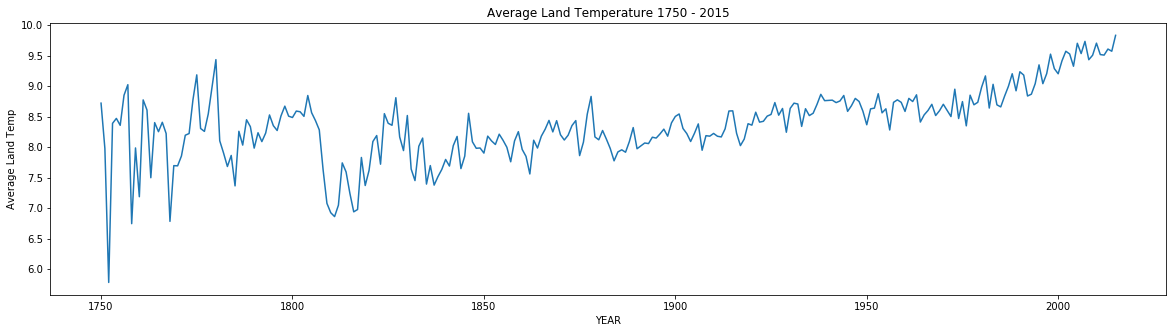

In [15]:
#Plot a New Graph With NewlyFilled data
plt.figure(figsize=(20,5))
plt.plot(grouped["LandAverageTemperature"])
plt.title("Average Land Temperature 1750 - 2015")
plt.xlabel("YEAR")
plt.ylabel("Average Land Temp")
plt.show()

In [16]:
grouped.head()


,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [17]:
DF[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [18]:
DF[np.isnan(DF["LandAverageTemperature"])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [19]:
# Use previous valid observation to fill gap(fill Nan)

DF["LandAverageTemperature"]  = DF["LandAverageTemperature"].fillna(method = "ffill")


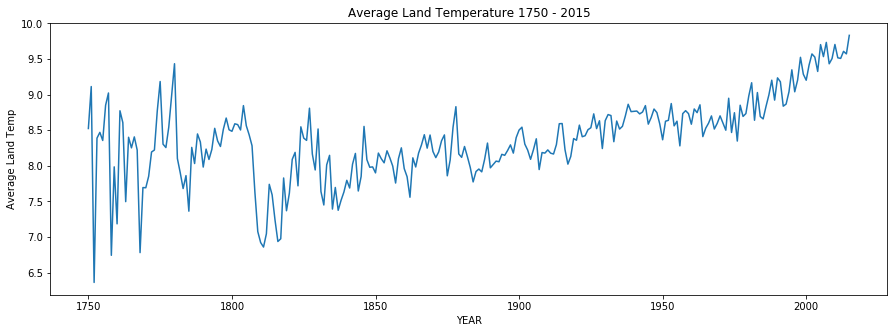

In [20]:
grouped = DF.groupby([times.year]).mean()


plt.figure(figsize=(15,5))
plt.plot(grouped["LandAverageTemperature"])
plt.title("Average Land Temperature 1750 - 2015")
plt.xlabel("YEAR")
plt.ylabel("Average Land Temp")
plt.show()

In [21]:
###Modelling 

from sklearn.linear_model import LinearRegression as Linreg


In [22]:
x = grouped.index.values.reshape(-1,1)
y = grouped["LandAverageTemperature"].values

In [23]:
reg = Linreg()
reg.fit(x,y)
y_pred = reg.predict(x)
print ("Accuracy:" + str(reg.score(x,y)))

Accuracy:0.37668322753090727


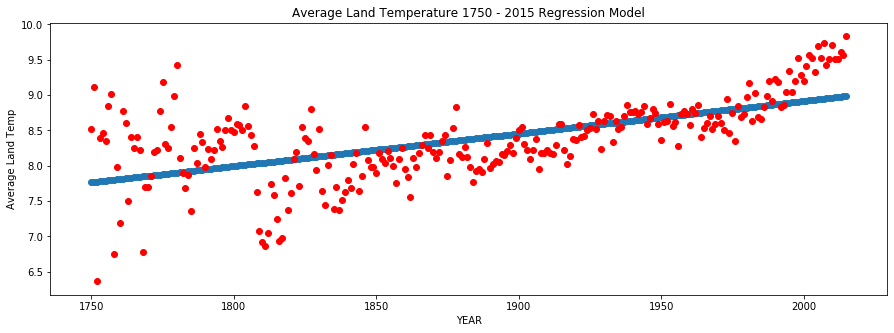

In [24]:
###Regression Model  

plt.figure(figsize=(15,5))
plt.title("Average Land Temperature 1750 - 2015 Regression Model")
plt.xlabel("YEAR")
plt.ylabel("Average Land Temp")
plt.scatter(x=x ,y=y_pred)
plt.scatter(x=x ,y=y ,c = "r")
plt.show()

In [31]:
reg.predict(np.array([2050]).reshape(1, 1))

array([9.14631486])

In [30]:
### Comunicating Data

